In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns



In [2]:
dir= "C:\\Study\\1014\\1014\\NFL_Analysis\\"

In [3]:
con =sqlite3.connect(dir+"nfl_2024.db")

sql_command = """

select a.*, case when club=possessionTeam then 1 else 0 end as attack 
from
(select gameId,playId, frameId, case when nflId is null then 99999 else nflId end as nflId,club,playDirection, x,y,s,a,dir,o,dis from tracking_data) A
inner JOIN
(
select gameId,playId, min(frameId) as frameId from tracking_data
where event in ('ball_snap','autoevent_ballsnap','man_in_motion')
group by gameId, PlayId
--having min(frameId) >10
)B
on A.gameId=b.gameId
and a.playId=b.playId
and a.frameId>=b.frameId
and a.frameId<=b.frameId+5
inner join plays c
on A.gameId=c.gameId
and a.playId=c.playId


"""
td=pd.read_sql_query(sql_command,con)
con.close()
td.shape

(874248, 14)

In [4]:
td.head()

,gameId,playId,frameId,nflId,club,playDirection,x,y,s,a,dir,o,dis,attack
0,2022090800,101,6,35472,BUF,left,73.13,27.67,0.10,1.14,348.75,273.97,0.02,1
1,2022090800,101,7,35472,BUF,left,73.11,27.71,0.42,2.43,346.58,272.30,0.04,1
2,2022090800,101,8,35472,BUF,left,73.09,27.79,0.87,3.21,345.85,272.30,0.08,1
3,2022090800,101,9,35472,BUF,left,73.05,27.92,1.45,3.80,342.86,274.76,0.14,1
4,2022090800,101,10,35472,BUF,left,72.99,28.09,1.90,3.12,341.29,272.24,0.18,1


In [5]:
#creating a grid of 15X10 and assiging the grid to each player 
td['grid']=np.round(td.x/10,0).apply(int).astype(str).str.zfill(2)+np.round(td.y/5,0).apply(int).astype(str).str.zfill(2)


In [6]:
td['grid'].unique()

array(['0706', '0705', '0608', '0708', '0707', '0604', '0806', '0704',
       '0607', '0606', '0506', '0605', '0508', '0602', '0504', '0405',
       '0502', '0507', '0505', '0404', '0402', '0406', '0304', '0407',
       '0306', '0305', '0205', '0307', '0204', '0303', '0206', '0207',
       '0308', '0603', '0503', '1006', '1005', '1002', '1008', '1007',
       '1106', '0904', '0907', '1105', '0409', '0403', '0709', '0609',
       '0509', '0103', '0106', '0202', '0105', '0408', '0203', '0703',
       '0807', '0805', '0804', '1004', '0905', '0908', '0903', '1003',
       '0906', '0802', '0809', '0702', '0803', '1107', '1102', '1103',
       '0902', '1009', '0909', '0808', '0208', '0107', '0302', '0108',
       '0104', '0309', '1104', '1205', '0102', '0109', '0209', '1108',
       '1109', '0501', '0601', '0510', '0610', '0006', '0500', '0401',
       '0701', '0005', '0301', '0901', '1001', '0710', '0400', '1206',
       '0801', '0101', '0201', '0910', '0003', '0007', '0008', '0004',
      

In [7]:
td['order']=td.groupby(['gameId','playId','nflId'])['frameId'].rank('first').apply(int)

td_start=td[['gameId', 'playId','nflId', 'x', 'y', 's', 'a', 'dir', 'o', 'dis','order']]

td_start['order']=td_start['order'].apply(str).str.zfill(2)

td_start= td_start.pivot_table(index=['gameId','playId','nflId'],columns=['order'],values=[ 'x', 'y', 's', 'a', 'dir', 'o', 'dis'],aggfunc='first')

td_start.columns = ['_lag_'.join(col) for col in td_start.columns.values]
td_start=td_start.reset_index()
td_start.head()

C:\study_tools\envs\DL\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,gameId,playId,nflId,a_lag_01,a_lag_02,a_lag_03,a_lag_04,a_lag_05,a_lag_06,dir_lag_01,...,x_lag_03,x_lag_04,x_lag_05,x_lag_06,y_lag_01,y_lag_02,y_lag_03,y_lag_04,y_lag_05,y_lag_06
0,2022090800,101,35472,1.14,2.43,3.21,3.80,3.12,2.54,348.75,...,73.09,73.05,72.99,72.91,27.67,27.71,27.79,27.92,28.09,28.31
1,2022090800,101,38577,0.06,0.07,0.10,0.11,0.12,0.41,26.33,...,67.34,67.36,67.37,67.40,29.96,29.99,30.07,30.12,30.17,30.24
2,2022090800,101,41239,0.03,0.33,0.85,1.95,2.52,3.26,95.37,...,71.32,71.33,71.36,71.40,26.43,26.43,26.44,26.47,26.52,26.63
3,2022090800,101,42392,0.08,0.96,1.44,1.89,2.35,2.06,224.11,...,72.48,72.44,72.39,72.33,29.47,29.49,29.52,29.57,29.65,29.75
4,2022090800,101,42816,0.23,0.10,0.02,0.11,0.18,0.25,0.54,...,64.64,64.63,64.62,64.60,40.90,40.95,40.99,41.04,41.11,41.18


In [8]:
td_cat=pd.get_dummies(td[['gameId','playId','nflId','playDirection','club']].drop_duplicates(), columns = ['playDirection','club'])


In [9]:
td_start.shape,td_cat.shape

((145708, 45), (145708, 38))

In [10]:
con =sqlite3.connect(dir+"nfl_2024.db")

sql_command = """

select A.gameId,A.playId, case when nflId is null then 99999 else nflId end as nflId,x,y from
tracking_data A
inner join
(select gameId,playId, min(frameId) as frameId  from tracking_data 
where event in ('pass_arrived','first_contact') group by gameId,PlayId
)B
on A.gameId=b.gameId and A.playId=B.playID and A.frameId=b.frameID

inner join 
plays C
on A. gameId=C.gameId and 
A.playId=C.playId AND
A.nflId=C.ballCarrierId


"""
rec_end=pd.read_sql_query(sql_command,con)
con.close()

In [11]:
rec_end.head()

,gameId,playId,nflId,x,y
0,2022090800,56,42489,80.48,37.68
1,2022090800,80,46076,75.53,39.40
2,2022090800,101,47857,70.62,40.56
3,2022090800,122,47857,68.52,37.19
4,2022090800,146,47857,59.37,23.73


In [12]:
#creating a grid of 15X10 and assiging the grid to each player 
rec_end['grid_end']=np.round(rec_end.x/10,0).apply(int).astype(str).str.zfill(2)+np.round(rec_end.y/5,0).apply(int).astype(str).str.zfill(2)


In [13]:
rec_end['grid_end'].unique()

array(['0808', '0708', '0707', '0605', '0506', '0508', '0409', '0209',
       '0306', '0500', '0505', '0503', '0609', '0604', '1007', '0908',
       '0903', '0601', '0603', '0404', '0801', '0402', '0607', '0809',
       '0504', '0502', '0408', '0203', '0205', '0510', '0406', '0202',
       '0305', '0602', '0302', '0303', '0106', '0610', '0606', '0705',
       '1004', '0902', '0805', '0804', '0704', '0706', '1006', '1104',
       '1102', '0901', '0802', '0701', '1003', '0807', '0806', '0703',
       '0709', '0906', '0905', '0907', '0307', '0803', '0405', '0403',
       '0407', '0410', '1008', '0501', '0702', '0401', '0710', '0909',
       '0102', '0700', '0800', '0608', '0304', '0904', '0507', '0509',
       '1009', '1005', '0206', '0109', '0811', '0207', '0107', '0104',
       '0308', '1105', '0108', '0105', '1001', '0301', '0204', '1110',
       '1106', '0210', '0208', '0201', '0600', '0810', '0101', '0310',
       '0611', '1108', '0309', '1002', '0103', '0910', '1101', '1010',
      

In [14]:
rec_end.shape,td.shape

((11625, 6), (874248, 16))

In [15]:
rec_end[['gameId','playId','grid_end']].drop_duplicates().shape

(11625, 3)

In [16]:
td_start[['gameId','playId']].drop_duplicates().shape,td_cat[['gameId','playId']].drop_duplicates().shape,rec_end[['gameId','playId']].drop_duplicates().shape

((6338, 2), (6338, 2), (11625, 2))

In [17]:
td_start.merge(td_cat,how='inner',on=['gameId','playId','nflId']).shape

(145708, 80)

In [18]:
inputdata= td_start.merge(td_cat,how='inner',on=['gameId','playId','nflId'])
inputdata['grid_start']=np.round(inputdata.x_lag_01/10,0).apply(int).astype(str).str.zfill(2)+np.round(inputdata.y_lag_01/5,0).apply(int).astype(str).str.zfill(2)

inputdata=inputdata.merge(rec_end[['gameId','playId','grid_end','nflId']],how='inner',on=['gameId','playId'],suffixes=('', '_target'))

inputdata['pass']=np.where(inputdata['nflId']==inputdata['nflId_target'],1,0)

inputdata.shape

(137494, 84)

In [19]:
inputdata.head()

,gameId,playId,nflId,a_lag_01,a_lag_02,a_lag_03,a_lag_04,a_lag_05,a_lag_06,dir_lag_01,...,club_SEA,club_SF,club_TB,club_TEN,club_WAS,club_football,grid_start,grid_end,nflId_target,pass
0,2022090800,101,35472,1.14,2.43,3.21,3.80,3.12,2.54,348.75,...,0,0,0,0,0,0,0706,0708,47857,0
1,2022090800,101,38577,0.06,0.07,0.10,0.11,0.12,0.41,26.33,...,0,0,0,0,0,0,0706,0708,47857,0
2,2022090800,101,41239,0.03,0.33,0.85,1.95,2.52,3.26,95.37,...,0,0,0,0,0,0,0705,0708,47857,0
3,2022090800,101,42392,0.08,0.96,1.44,1.89,2.35,2.06,224.11,...,0,0,0,0,0,0,0706,0708,47857,0
4,2022090800,101,42816,0.23,0.10,0.02,0.11,0.18,0.25,0.54,...,0,0,0,0,0,0,0608,0708,47857,0


In [20]:
inputdata.columns

Index(['gameId', 'playId', 'nflId', 'a_lag_01', 'a_lag_02', 'a_lag_03',
       'a_lag_04', 'a_lag_05', 'a_lag_06', 'dir_lag_01', 'dir_lag_02',
       'dir_lag_03', 'dir_lag_04', 'dir_lag_05', 'dir_lag_06', 'dis_lag_01',
       'dis_lag_02', 'dis_lag_03', 'dis_lag_04', 'dis_lag_05', 'dis_lag_06',
       'o_lag_01', 'o_lag_02', 'o_lag_03', 'o_lag_04', 'o_lag_05', 'o_lag_06',
       's_lag_01', 's_lag_02', 's_lag_03', 's_lag_04', 's_lag_05', 's_lag_06',
       'x_lag_01', 'x_lag_02', 'x_lag_03', 'x_lag_04', 'x_lag_05', 'x_lag_06',
       'y_lag_01', 'y_lag_02', 'y_lag_03', 'y_lag_04', 'y_lag_05', 'y_lag_06',
       'playDirection_left', 'playDirection_right', 'club_ARI', 'club_ATL',
       'club_BAL', 'club_BUF', 'club_CAR', 'club_CHI', 'club_CIN', 'club_CLE',
       'club_DAL', 'club_DEN', 'club_DET', 'club_GB', 'club_HOU', 'club_IND',
       'club_JAX', 'club_KC', 'club_LA', 'club_LAC', 'club_LV', 'club_MIA',
       'club_MIN', 'club_NE', 'club_NO', 'club_NYG', 'club_NYJ', 'club_PHI',
 

In [21]:
inputdata['key']=inputdata.gameId.astype(str)+inputdata.playId.astype(str)
inputdata.head()

,gameId,playId,nflId,a_lag_01,a_lag_02,a_lag_03,a_lag_04,a_lag_05,a_lag_06,dir_lag_01,...,club_SF,club_TB,club_TEN,club_WAS,club_football,grid_start,grid_end,nflId_target,pass,key
0,2022090800,101,35472,1.14,2.43,3.21,3.80,3.12,2.54,348.75,...,0,0,0,0,0,0706,0708,47857,0,2022090800101
1,2022090800,101,38577,0.06,0.07,0.10,0.11,0.12,0.41,26.33,...,0,0,0,0,0,0706,0708,47857,0,2022090800101
2,2022090800,101,41239,0.03,0.33,0.85,1.95,2.52,3.26,95.37,...,0,0,0,0,0,0705,0708,47857,0,2022090800101
3,2022090800,101,42392,0.08,0.96,1.44,1.89,2.35,2.06,224.11,...,0,0,0,0,0,0706,0708,47857,0,2022090800101
4,2022090800,101,42816,0.23,0.10,0.02,0.11,0.18,0.25,0.54,...,0,0,0,0,0,0608,0708,47857,0,2022090800101


In [22]:
con =sqlite3.connect(dir+"nfl_2024.db")

sql_command = """

select nflId,position from players


"""
player=pd.read_sql_query(sql_command,con)
con.close()

In [23]:
inputdata=inputdata.merge(player, how='inner',on =['nflId'])
inputdata['position']=inputdata.position+inputdata.groupby(['gameId','playId','position'])['nflId'].rank('first').apply(int).astype(str)
inputdata=pd.get_dummies(inputdata, columns = ['position'])
inputdata.head()

,gameId,playId,nflId,a_lag_01,a_lag_02,a_lag_03,a_lag_04,a_lag_05,a_lag_06,dir_lag_01,...,position_T4,position_TE1,position_TE2,position_TE3,position_TE4,position_WR1,position_WR2,position_WR3,position_WR4,position_WR5
0,2022090800,101,35472,1.14,2.43,3.21,3.80,3.12,2.54,348.75,...,0,0,0,0,0,0,0,0,0,0
1,2022090800,146,35472,0.66,1.03,1.30,1.47,1.37,1.08,276.09,...,0,0,0,0,0,0,0,0,0,0
2,2022090800,191,35472,2.00,2.45,2.33,2.84,3.42,3.06,354.99,...,0,0,0,0,0,0,0,0,0,0
3,2022090800,529,35472,0.01,0.01,0.01,0.01,0.01,0.42,202.38,...,0,0,0,0,0,0,0,0,0,0
4,2022090800,896,35472,0.67,1.08,2.01,2.16,2.47,2.32,151.23,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# cahnge the above script such that start position is a node feature and end position as the targey prector, 
# eso we will have a multiclass prediction problem

In [24]:
def column_index(series, offset=0):
    return {k: v+offset for v, k in enumerate(series.value_counts().index.values)}

In [26]:
key2idx = {v: idx for idx, v in enumerate(inputdata['key'].values)}
plyrid2idx = column_index(inputdata['nflId'])
grid_start2idx = column_index(inputdata['grid_start'])
grid_end2idx = column_index(inputdata['grid_end'])

In [27]:
inputdata['keyIdx'] = inputdata['key'].map(key2idx)
inputdata = inputdata.sort_values(by='keyIdx')
inputdata['playerIdx'] = inputdata['nflId'].map(plyrid2idx)
inputdata['grid_startIdx'] =inputdata['grid_start'].map(grid_start2idx)
inputdata['grid_endIdx'] =inputdata['grid_end'].map(grid_end2idx)

In [28]:
y_pass = inputdata.sort_values(by='keyIdx')['pass'].values
y_pass

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
sum(y_pass)

5978

In [30]:
baseline = y_pass[y_pass>=0].mean()
baseline

0.045454545454545456

In [31]:
#node_id_cols = ['keyIdx', 'positionIdx', 'grid_startIdx','grid_endIdx']
node_id_cols = ['keyIdx', 'playerIdx','grid_startIdx','grid_endIdx']

In [32]:
N_nodes = inputdata[node_id_cols].nunique().sum()
N_nodes

7857

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(inputdata, test_size=0.2, random_state=1)
train.shape

(105212, 146)

In [34]:
N_labels = train.shape[0]

# Construct edges

In [35]:
from itertools import combinations

In [36]:
import dgl
from dgl import function as fn

C:\study_tools\envs\DL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
import torch as th
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [38]:
edge_dict = dict()
for src_type, dst_type in combinations(node_id_cols, 2):
    fwd = (src_type, f'{src_type}-{dst_type}', dst_type)
    bwd = (dst_type, f'{dst_type}-{src_type}', src_type)
    print(fwd)
    print(bwd)
    print('-'*50)
    
    edges = inputdata[[src_type, dst_type]].drop_duplicates().values
    src = edges[:,0]
    dst = edges[:,1]

    edge_dict[fwd] = (th.tensor(src), th.tensor(dst))
    edge_dict[bwd] = (th.tensor(dst), th.tensor(src))

('keyIdx', 'keyIdx-playerIdx', 'playerIdx')
('playerIdx', 'playerIdx-keyIdx', 'keyIdx')
--------------------------------------------------
('keyIdx', 'keyIdx-grid_startIdx', 'grid_startIdx')
('grid_startIdx', 'grid_startIdx-keyIdx', 'keyIdx')
--------------------------------------------------
('keyIdx', 'keyIdx-grid_endIdx', 'grid_endIdx')
('grid_endIdx', 'grid_endIdx-keyIdx', 'keyIdx')
--------------------------------------------------
('playerIdx', 'playerIdx-grid_startIdx', 'grid_startIdx')
('grid_startIdx', 'grid_startIdx-playerIdx', 'playerIdx')
--------------------------------------------------
('playerIdx', 'playerIdx-grid_endIdx', 'grid_endIdx')
('grid_endIdx', 'grid_endIdx-playerIdx', 'playerIdx')
--------------------------------------------------
('grid_startIdx', 'grid_startIdx-grid_endIdx', 'grid_endIdx')
('grid_endIdx', 'grid_endIdx-grid_startIdx', 'grid_startIdx')
--------------------------------------------------


In [39]:
hg = dgl.heterograph(edge_dict)

In [40]:
label_feat = dict()
for ntype in hg.ntypes:
    if ntype=='keyIdx':
        continue
    label_feat[ntype] = th.zeros(hg.number_of_nodes(ntype))+baseline
label_feat['keyIdx'] = th.tensor(np.nan_to_num(y_pass, nan=baseline)).float()

In [41]:
hg.ndata['label'] = label_feat

In [ ]:
hg.ndata

In [42]:
assert hg.number_of_nodes('keyIdx')==y_pass.shape[0]
assert (inputdata['pass']==1).sum() == (dgl.to_homogeneous(hg, ndata=['label']).ndata['label']==1).sum().item()

In [43]:
dummies=['playDirection_left',
         'playDirection_right',
         'club_ARI',
         'club_ATL',
         'club_BAL',
         'club_BUF',
         'club_CAR',
         'club_CHI',
         'club_CIN',
         'club_CLE',
         'club_DAL',
         'club_DEN',
         'club_DET',
         'club_GB',
         'club_HOU',
         'club_IND',
         'club_JAX',
         'club_KC',
         'club_LA',
         'club_LAC',
         'club_LV',
         'club_MIA',
         'club_MIN',
         'club_NE',
         'club_NO',
         'club_NYG',
         'club_NYJ',
         'club_PHI',
         'club_PIT',
         'club_SEA',
         'club_SF',
         'club_TB',
         'club_TEN',
         'club_WAS',
         'position_C1',
         'position_C2',
         'position_CB1',
         'position_CB2',
         'position_CB3',
         'position_CB4',
         'position_DB1',
         'position_DE1',
         'position_DE2',
         'position_DE3',
         'position_DE4',
         'position_DT1',
         'position_DT2',
         'position_DT3',
         'position_DT4',
         'position_FB1',
         'position_FS1',
         'position_FS2',
         'position_FS3',
         'position_G1',
         'position_G2',
         'position_G3',
         'position_G4',
         'position_ILB1',
         'position_ILB2',
         'position_ILB3',
         'position_ILB4',
         'position_MLB1',
         'position_MLB2',
         'position_NT1',
         'position_NT2',
         'position_NT3',
         'position_OLB1',
         'position_OLB2',
         'position_OLB3',
         'position_OLB4',
         'position_QB1',
         'position_QB2',
         'position_RB1',
         'position_RB2',
         'position_RB3',
         'position_SS1',
         'position_SS2',
         'position_SS3',
         'position_T1',
         'position_T2',
         'position_T3',
         'position_T4',
         'position_TE1',
         'position_TE2',
         'position_TE3',
         'position_TE4',
         'position_WR1',
         'position_WR2',
         'position_WR3',
         'position_WR4',
         'position_WR5']
q_vars= ['a_lag_01',
         'a_lag_02',
         'a_lag_03',
         'a_lag_04',
         'a_lag_05',
         'a_lag_06',
         'dir_lag_01',
         'dir_lag_02',
         'dir_lag_03',
         'dir_lag_04',
         'dir_lag_05',
         'dir_lag_06',
         'dis_lag_01',
         'dis_lag_02',
         'dis_lag_03',
         'dis_lag_04',
         'dis_lag_05',
         'dis_lag_06',
         'o_lag_01',
         'o_lag_02',
         'o_lag_03',
         'o_lag_04',
         'o_lag_05',
         'o_lag_06',
         's_lag_01',
         's_lag_02',
         's_lag_03',
         's_lag_04',
         's_lag_05',
         's_lag_06',
         'x_lag_01',
         'x_lag_02',
         'x_lag_03',
         'x_lag_04',
         'x_lag_05',
         'x_lag_06',
         'y_lag_01',
         'y_lag_02',
         'y_lag_03',
         'y_lag_04',
         'y_lag_05',
         'y_lag_06']

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

inputdata_norm = inputdata.copy(deep=True)  
inputdata_norm[q_vars]=scaler.fit_transform(inputdata_norm[q_vars])


X_ohe = inputdata_norm[dummies].values
X_num =inputdata_norm[q_vars].values
#X_num = (X_num - X_num.mean(axis=0))/(X_num.max(axis=0) - X_num.min(axis=0))
X = np.concatenate([X_ohe, X_num], axis=1)

In [ ]:
X.shape

# GNN training

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score

In [47]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')
    
def plot_pr(y_trues, y_preds, labels):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        auc = roc_auc_score(y_true, y_pred)
        pr, re, thresholds = precision_recall_curve(y_true, y_pred)
        ax.plot(re, pr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)
        
        f1_scores = 2*re*pr/(re+pr)
        print(labels[i])
        print('Best threshold: ', thresholds[np.argmax(f1_scores)])
        print('Best F1-Score: ', np.max(f1_scores))

    ax.legend()
    ax.grid()
    ax.set_title('Precision-Recall curve')
    ax.set_xlabel('Recall')
    _ = ax.set_ylabel('Precision')

In [48]:

# Indicies w/ labels (training data)
labeled_mask = np.zeros_like(y_pass, dtype=bool)
labeled_mask[:N_labels] = 1
#assert y_pass[labeled_mask].mean()==baseline

In [49]:
y_pass[labeled_mask].mean(),baseline

(0.04545108922936547, 0.045454545454545456)

In [50]:
# Split of training data into train/validation sets
rng = np.random.default_rng(1)
train_rate = 0.7
train_mask = (rng.random(y_pass.shape[0])>(1-train_rate))&labeled_mask
val_mask = ~train_mask&labeled_mask

In [51]:
test_mask = ~labeled_mask

In [52]:
# pass rate in train/val
y_pass[train_mask].mean(), y_pass[val_mask].mean()

(0.04576379364195603, 0.04472175593070028)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [54]:

from dgl.nn import GraphConv, HeteroGraphConv, WeightBasis

In [55]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import dgl
from dgl.dataloading import DataLoader
from dgl.nn.pytorch import GraphConv, HeteroGraphConv

# Plot losses
def plot_losses(train_losses, val_losses, log=False):
    fig, ax = plt.subplots()
    ax.plot(train_losses, label='Train')
    ax.plot(val_losses, label='Val')
    ax.set(xlabel='Epoch', ylabel='CrossEnt')
    if log:
        ax.set_yscale('log')
    ax.legend()
    ax.grid()

@th.no_grad()
def infer(model_cp, hg, mask, best_model_fp=None):
    if best_model_fp:
        print("loading from disk")
        model = deepcopy(model_cp)
        model.load_state_dict(th.load(best_model_fp))
    else:
        model = model_cp

    model.eval()
    
    features = hg.ndata['feat']

    sampler = dgl.dataloading.MultiLayerNeighborSampler([15] * len(model.convs))
    dataloader = DataLoader(
        hg, {'keyIdx': th.where(mask)[0]}, sampler,
        batch_size=1024, shuffle=False, drop_last=False, num_workers=0)
    
    y_preds = list()
    for input_nodes, output_nodes, blocks in dataloader:
        h = {k: features[k][input_nodes[k]] for k in input_nodes.keys()}
        logits = model(blocks, h)
        y_preds.append(logits.softmax(dim=1))
        
    return th.cat(y_preds).cpu()

@th.no_grad()
def test(model, hg, mask, best_path=None):
    model.eval()
    
    features = hg.ndata['feat']

    sampler = dgl.dataloading.MultiLayerNeighborSampler([15] * len(model.convs))
    dataloader = DataLoader(
        hg, {'keyIdx': th.where(mask)[0]}, sampler,
        batch_size=1024, shuffle=False, drop_last=False, num_workers=0)

    labels = hg.ndata['label']['keyIdx'].long()
    
    correct = list()
    for input_nodes, output_nodes, blocks in dataloader:
        h = {k: features[k][input_nodes[k]] for k in input_nodes.keys()}
        
        logits = model(blocks, h)
        y_preds = logits.argmax(1)
        n_correct = (labels[output_nodes['keyIdx']] == y_preds).sum().item()
        correct.append(n_correct)

    acc = sum(correct) / th.where(mask)[0].shape[0]

    return acc

def train_step(model, hg, features, train_mask, val_mask, optimizer, loss_fn, weight=False):
    model.train()
    optimizer.zero_grad()

    sampler = dgl.dataloading.MultiLayerNeighborSampler([15] * len(model.convs))
    dataloader = DataLoader(
        hg, {'keyIdx': th.where(train_mask)[0]}, sampler,
        batch_size=1024, shuffle=True, drop_last=False, num_workers=0)
    
    val_loader = DataLoader(
        hg, {'keyIdx': th.where(val_mask)[0]}, sampler,
        batch_size=1024, shuffle=False, drop_last=False, num_workers=0)
    
    train_losses = list()
    if weight:
        weight = th.tensor([1., 1 / baseline]).float()
    else:
        weight = None
        
    labels = hg.ndata['label']['keyIdx'].long()
    
    for input_nodes, output_nodes, blocks in dataloader:
        h = {k: features[k][input_nodes[k]] for k in input_nodes.keys()}
        
        logits = model(blocks, h)
        loss = loss_fn(logits, labels[output_nodes['keyIdx']], weight=weight)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        train_losses.append(loss.item())

    val_losses = list()
    with th.no_grad():
        for input_nodes, output_nodes, blocks in val_loader:
            h = {k: features[k][input_nodes[k]] for k in input_nodes.keys()}
            
            logits = model(blocks, h)
            val_loss = loss_fn(logits, labels[output_nodes['keyIdx']])
            val_losses.append(val_loss.item())

    return np.array(train_losses).mean(), np.array(val_losses).mean()

def train(hg, split_idx, model, epochs, evaluator, 
          save_path, loss_fn=F.cross_entropy, lr=0.01, 
          es_criteria=5, weight_class=False, verbose=False):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    best_val_metric = 1e10
    train_losses = list()
    val_losses = list()

    features = hg.ndata['feat']
  
    train_mask = split_idx['train']
    val_mask = split_idx['valid']
    es_iters = 0
    
    for e in range(1, epochs + 1):
        train_loss, val_loss = train_step(
            model, hg, features, train_mask, val_mask, optimizer, loss_fn, weight_class,
        )
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        train_acc = test(model, hg, train_mask)
        val_acc = test(model, hg, val_mask)
        
        val_metric = val_loss
        
        if val_metric > 1e5:
            print(f"Early stopping for huge loss: {val_metric}")
            break

        if val_metric < best_val_metric:
            best_val_metric = val_metric
            th.save(model.state_dict(), save_path)
            es_iters = 0
        else:
            es_iters += 1

        if e % 5 == 0 and verbose:
            print('In epoch {}, loss: {:.3f}, val metric: {:.3f} (best {:.3f})'.format(
                e, train_loss, val_metric, best_val_metric))
            
        if es_iters >= es_criteria:
            print(f"Early stopping at {e} epochs")
            break
            
    return np.array(train_losses), np.array(val_losses)

class RelGraphConvLayer(nn.Module):
    def __init__(self,
                 in_feat,
                 out_feat,
                 rel_names,
                 *,
                 num_bases=None,
                 weight=True,
                 bias=True,
                 activation=None,
                 self_loop=False,
                 bn=False,
                 dropout=0.0):
        super(RelGraphConvLayer, self).__init__()
        self.in_feat = in_feat
        self.out_feat = out_feat
        self.rel_names = rel_names
        self.num_bases = num_bases
        self.bias = bias
        self.activation = activation
        self.self_loop = self_loop
        self.bn = bn

        self.conv = HeteroGraphConv({
                rel: GraphConv(in_feat, out_feat, norm='right', weight=False, bias=False)
                for rel in rel_names
            })

        self.use_weight = weight
        self.use_basis = num_bases is not None and num_bases < len(self.rel_names) and weight
        if self.use_weight:
            if self.use_basis:
                self.basis = WeightBasis((in_feat, out_feat), num_bases, len(self.rel_names))
            else:
                self.weight = nn.Parameter(th.Tensor(len(self.rel_names), in_feat, out_feat))
                nn.init.xavier_uniform_(self.weight, gain=nn.init.calculate_gain('relu'))

        if bias:
            self.h_bias = nn.Parameter(th.Tensor(out_feat))
            nn.init.zeros_(self.h_bias)

        if self.self_loop:
            self.loop_weight = nn.Parameter(th.Tensor(in_feat, out_feat))
            nn.init.xavier_uniform_(self.loop_weight, gain=nn.init.calculate_gain('relu'))
            
        if self.bn:
            self.bn_layer = nn.BatchNorm1d(out_feat)

        self.dropout = nn.Dropout(dropout)

    def forward(self, g, inputs):
        g = g.local_var()
        if self.use_weight:
            weight = self.basis() if self.use_basis else self.weight
            wdict = {self.rel_names[i]: {'weight': w.squeeze(0)}
                     for i, w in enumerate(th.split(weight, 1, dim=0))}
        else:
            wdict = {}

        if g.is_block:
            inputs_src = inputs
            inputs_dst = {k: v[:g.number_of_dst_nodes(k)] for k, v in inputs.items()}
        else:
            inputs_src = inputs_dst = inputs

        hs = self.conv(g, inputs, mod_kwargs=wdict)

        def _apply(ntype, h):
            if self.self_loop:
                h = h + th.matmul(inputs_dst[ntype], self.loop_weight)
            if self.bias:
                h = h + self.h_bias
            if self.bn:
                if h.size(0) > 1:
                    h = self.bn_layer(h)
            if self.activation:
                h = self.activation(h)
            return self.dropout(h)
        return {ntype: _apply(ntype, h) for ntype, h in hs.items()}

class RGCN(nn.Module):
    def __init__(self, hg, in_feats, h_feats, num_classes, num_layers, num_bases, 
                 self_loop=True, dropout=0, bn=False):

        super(RGCN, self).__init__()
        self.dropout = dropout
        
        self.convs = nn.ModuleList()
        activation_fn = nn.ReLU()
        self.convs.append(RelGraphConvLayer(
            in_feats, h_feats, hg.etypes, activation=activation_fn, dropout=dropout, 
            num_bases=num_bases, self_loop=self_loop, bn=bn))

        for _ in range(num_layers - 1):
            self.convs.append(RelGraphConvLayer(
                h_feats, h_feats, hg.etypes, activation=activation_fn, dropout=dropout, 
                num_bases=num_bases, self_loop=self_loop, bn=bn
            ))
        
        self.output_layer = nn.Linear(h_feats + in_feats, num_classes)

    def forward(self, blocks, in_feat):
        h = in_feat
        for i, conv in enumerate(self.convs):
            h = conv(blocks[i], h)

        h_in = blocks[-1].dstdata['feat']['keyIdx']
        h = self.output_layer(th.cat([h['keyIdx'], h_in], dim=1))
        return h

class LabelSmoothing(nn.Module):
    def __init__(self, smoothing=0.0):
        super(LabelSmoothing, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing

    def forward(self, x, target, weight=None):
        logprobs = nn.functional.log_softmax(x, dim=-1)
        nll_loss = -logprobs.gather(dim=-1, index=target.unsqueeze(1))
        nll_loss = nll_loss.squeeze(1)
        smooth_loss = -logprobs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()



C:\study_tools\envs\DL\lib\site-packages\dgl\dataloading\dataloader.py:1150: DGLWarning: Dataloader CPU affinity opt is not enabled, consider switching it on (see enable_cpu_affinity() or CPU best practices for DGL [https://docs.dgl.ai/tutorials/cpu/cpu_best_practises.html])
  f"Dataloader CPU affinity opt is not enabled, consider switching it on "


In epoch 5, loss: 0.319, val metric: 0.311 (best 0.311)
In epoch 10, loss: 0.316, val metric: 0.336 (best 0.310)
In epoch 15, loss: 0.312, val metric: 0.316 (best 0.310)
In epoch 20, loss: 0.310, val metric: 0.309 (best 0.308)
In epoch 25, loss: 0.309, val metric: 0.307 (best 0.306)
In epoch 30, loss: 0.309, val metric: 0.306 (best 0.304)
In epoch 35, loss: 0.309, val metric: 0.305 (best 0.304)
In epoch 40, loss: 0.309, val metric: 0.306 (best 0.304)
In epoch 45, loss: 0.309, val metric: 0.305 (best 0.304)
In epoch 50, loss: 0.310, val metric: 0.306 (best 0.304)
In epoch 55, loss: 0.309, val metric: 0.305 (best 0.304)
In epoch 60, loss: 0.309, val metric: 0.305 (best 0.304)
In epoch 65, loss: 0.309, val metric: 0.305 (best 0.304)
In epoch 70, loss: 0.309, val metric: 0.305 (best 0.304)
In epoch 75, loss: 0.308, val metric: 0.307 (best 0.304)
In epoch 80, loss: 0.309, val metric: 0.308 (best 0.304)
In epoch 85, loss: 0.309, val metric: 0.307 (best 0.304)
In epoch 90, loss: 0.309, val me

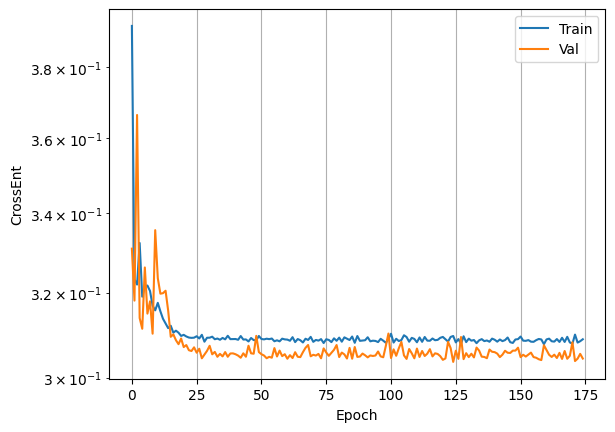

In [56]:

for ntype in hg.ntypes:
    if ntype == 'keyIdx':
        X_tmp = th.tensor(X).float()
    else:
        X_rand = th.rand((hg.num_nodes(ntype), X.shape[1] - 1)) - 0.5
        in_degrees = th.zeros(hg.num_nodes(ntype))
        for cetype in hg.canonical_etypes:
            if ntype == cetype[2]:
                in_degrees += hg.in_degrees(etype=cetype)
        in_degrees = th.log(in_degrees).reshape((-1, 1))
        in_degrees -= in_degrees.mean()
        X_tmp = th.hstack([X_rand, in_degrees])
    hg.nodes[ntype].data['feat'] = X_tmp

split_mask = {
    'train': th.tensor(train_mask),
    'valid': th.tensor(val_mask),
    'test': th.tensor(test_mask)
}

loss_fn = LabelSmoothing(smoothing=0.1)

model_kwargs = dict(
    in_feats=X.shape[1], h_feats=256, num_classes=2, 
    num_layers=2, dropout=0.1, num_bases=None,
    self_loop=False, bn=True,
)
model = RGCN(hg, **model_kwargs)

train_losses, val_losses = train(
    hg, split_mask, model, 500, None, 
    'models/rgcn.pt', loss_fn=loss_fn, lr=0.001, 
    es_criteria=50, verbose=True, weight_class=True,
)

plot_losses(train_losses, val_losses, log=True)

y_val_hat_rgcn = infer(model, hg, split_mask['valid'], 'models/rgcn.pt')



In [57]:
@th.no_grad()
def compute_accuracy(predictions, labels):
    preds = predictions.argmax(dim=1)
    correct = (preds == labels).sum().item()
    total = labels.shape[0]
    accuracy = correct / total
    return accuracy

# Assuming y_val_hat_rgcn are the predictions from the validation set
labels = hg.ndata['label']['keyIdx'][split_mask['valid']].long()
accuracy = compute_accuracy(y_val_hat_rgcn, labels)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 95.52%


In [58]:
y_test_hat_rgcn = infer(model, hg, split_mask['test'], 'models/rgcn.pt')
# Assuming y_val_hat_rgcn are the predictions from the validation set
labels = hg.ndata['label']['keyIdx'][split_mask['test']].long()
accuracy = compute_accuracy(y_test_hat_rgcn, labels)

print(f"Test data Accuracy: {accuracy * 100:.2f}%")

loading from disk
Test data Accuracy: 95.45%


In [1]:
## # Extract validation node indices
## val_node_indices = th.where(split_mask['valid'])[0]
## 
## # Extract validation features and labels
## val_features = hg.ndata['feat']['keyIdx'][val_node_indices].cpu().numpy()
## val_labels = hg.ndata['label']['keyIdx'][val_node_indices].cpu().numpy()
## 
## # Convert predictions to numpy array
## val_predictions = y_val_hat_rgcn.argmax(dim=1).numpy()
## 
## # Extract node_id_cols values
## 
## val_keyIdx = inputdata.loc[val_node_indices, 'keyIdx'].values
## val_playerIdx =inputdata.loc[val_node_indices, 'playerIdx'].values
## val_grid_startIdx = inputdata.loc[val_node_indices, 'grid_startIdx'].values
## val_grid_endIdx = inputdata.loc[val_node_indices, 'grid_endIdx'].values
## 
## 
## # Create a dictionary for comparison DataFrame
## data = {name: val_features[:, i] for i, name in enumerate(dummies+q_vars)}
## 
## data['keyIdx'] = val_keyIdx
## data['playerIdx']=val_playerIdx
## data['grid_startIdx'] = val_grid_startIdx
## data['grid_endIdx'] = val_grid_endIdx
## 
## data['True_Label'] = val_labels
## data['Predicted_Label'] = val_predictions
## 
## # Create the DataFrame
## comparison_df = pd.DataFrame(data)

In [2]:
## comparison_df.head()

In [3]:
##  # Define the inverse mapping functions
##  def inverse_column_index(mapping):
##      return {v: k for k, v in mapping.items()}
##  
##  # Create inverse mappings for key2idx, grid_start2idx, and grid_end2idx
##  idx2key = inverse_column_index(key2idx)
##  idx2player= inverse_column_index(plyrid2idx)
##  idx2grid_start = inverse_column_index(grid_start2idx)
##  idx2grid_end = inverse_column_index(grid_end2idx)
##  
##  # Map indices back to their original values in the inputdata DataFrame
##  comparison_df['key'] = inputdata['keyIdx'].map(idx2key)
##  
##  comparison_df['nflId'] = inputdata['playerIdx'].map(idx2player)
##  comparison_df['grid_start'] = inputdata['grid_startIdx'].map(idx2grid_start)
##  comparison_df['grid_end'] = inputdata['grid_endIdx'].map(idx2grid_end)
##  